In [48]:
from qlearning_solver import QLearningSolver
from tester import Tester
import numpy as np

tester = Tester()

### Single Q-Learning agent trained

In [49]:
solver = QLearningSolver(tester.get_obs_size(), tester.get_act_size())

# Train the agent
q_table = solver.train(tester.step_f, tester.reset_f, num_episodes=5000, max_steps=100)

total_rewards = tester.evaluate(q_table)
# print(total_rewards)
print(f"Mean total reward (100 samples):             {np.mean(total_rewards)}")
print(f"Std deviation of total reward (100 samples): {np.std(total_rewards)}")

Mean total reward (100 samples):             -13.0
Std deviation of total reward (100 samples): 0.0


![Example Performance](../img/cliffwalking.gif)

Fig. 1 Example performance of agent that learned on 5000 episodes

The standart deviation of rewards from validation runs always equals 0 so the resulting algorythm is fully deterministic

### Single random agent solve

In [50]:
total_rewards = tester.evaluate_random_agent()
# print(total_rewards)
print(f"Mean total reward (100 samples):             {np.mean(total_rewards)}")
print(f"Std deviation of total reward (100 samples): {np.std(total_rewards)}")

Mean total reward (100 samples):             -1086.9
Std deviation of total reward (100 samples): 496.886033210836


### Varying training episode amount

In [ ]:
episode_num_list = [100, 500, 700, 1000, 1200, 2500, 5000]
all_avgs = []
all_stds = []
AVERAGE_SIZE = 10

for episode_num in episode_num_list:
    avgs = []
    stds = []
    for _ in range(AVERAGE_SIZE):
        q_table = solver.train(tester.step_f, tester.reset_f, num_episodes=episode_num, max_steps=100)
        total_rewards = tester.evaluate(q_table)
        avgs.append(np.mean(total_rewards))
        stds.append(np.std(total_rewards))
    all_avgs.append(avgs)
    all_stds.append(stds)


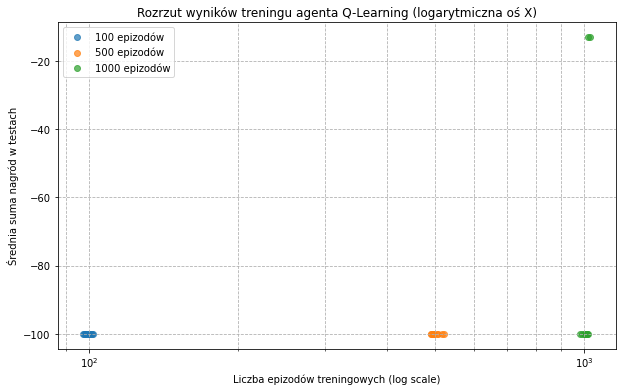

In [ ]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))

# scattering same dots wider and labeling 
for i, episode_num in enumerate(episode_num_list):
    x = np.random.normal(loc=episode_num, scale=episode_num*0.02, size=AVERAGE_SIZE)
    plt.scatter(x, all_avgs[i], alpha=0.7, label=f"{episode_num} episodes")

plt.xscale('log')
plt.xlabel("Number of training episodes (log scale)")
plt.ylabel("Average total reward in each test")
plt.title("Scatter of Q-Learning agent training results")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()